# Generative Adversarial Network

The emergence of deep learning has brought Artificial Intelligence (AI) into the spotlight for image processing [1, 2].  Deep learning is capable of training computers to perform a wide range of tasks, such as image and speech recognition, using vast amounts of data. However, when it comes to creative endeavors, deep learning has limitations. For example, creating a new painting in the style of Van Gogh by having a computer learn from his paintings is a daunting task [3, 4]. This is where generative adversarial networks (GANs) come in. Proposed by Goodfellow et al [5]. in 2014, GANs were a groundbreaking concept in the field of artificial intelligence. GANs are considered by many researchers to be the most exciting idea in machine learning in the past decade [6, 7].
The basic idea of GANs stems from the binary zero-sum game. The model consists of two competing parts: the generative model and the discriminative model. The generative model aims to produce data that is similar to real data by capturing the potential distribution of real data samples, while the discriminative model tries to correctly judge whether the input data comes from the real data or the generative model. In order to win this game, both models need to constantly optimize their abilities to generate and discriminate data. Once the discriminative model can no longer identify the data source correctly, the generative model is believed to have learned the real data distribution, and both models have reached the Nash equilibrium [4, 8, 9].
GAN has become a highly discussed topic in machine learning, and has achieved significant improvements in computer vision tasks, including image processing [10], image style transfer [11], classification [12], and image generation [13]. Many variants of GAN models have been proposed in different fields, making it one of the most active algorithms in deep learning.

## GAN Network Structure

The GAN architecture consists of two networks, namely the generator (G) and the discriminator (D), which are typically implemented as deep neural networks serving as implicit function expressions [14, 15]. The model structure of GAN is depicted in Figure 1, where G is responsible for learning the data distribution from actual samples and mapping it to a new space. The generated data is represented as G(z), with a corresponding distribution pg(z). The primary objective of GAN is to make pg(z) resemble the distribution of the training samples, pr(x). The input to D can either be real data x or generated data G(z), and the output of D is either a probability or a scalar that predicts whether the input to D originates from the real distribution [3].

<img src="https://drive.google.com/uc?export=view&id=1FJAzRnhBhVD2ILPeI7mJmYRT9YLD7ubt" width="820">


<!-- <img src="https://lh4.googleusercontent.com/r9o_j0_nSS_UEaoBLsPCxB92iyZaxaSB56nKbscr03Tq-bhiSfggqzmy6KAy4RDwcuW3q7oC9wBLbLDg4-DVUOQ16J4uQdPUxMMFDzpM8cS1hTu0jLYo3sZ0M24OKKTRsYN7hNyJIJ1YZpaoog" width="820"> -->


1. The Generator: G utilizes random variables z drawn from the prior distribution, and maps them through a neural network to create pseudo-sample distributions G(z), which is essentially an upsampling process. The input z usually consists of Gaussian noise or a random variable in the latent space. During GAN training, the parameters of G and D are iteratively updated. When G is being trained, the parameters of D remain fixed. The data produced by G is labeled as fake and fed into D. The error between the output of the discriminator D(G(z)) and the sample label is calculated, and the error backpropagation algorithm is used to update the parameters of G. Input variables in G are subjected to minimal constraints and can be inputted to both the first and last layers. Noise can be added to hidden layers in the form of either summation product or mosaic. GAN doesn't impose any limitations on the input dimension of z, which is typically a 100-dimensional vector. Additionally, G must be differentiable because the feedback passed through the discriminator returns gradients to update the parameters of both G and D.

2. The Discriminator: The purpose of discriminator D is to distinguish whether the input comes from a genuine sample and provide a feedback mechanism that fine-tunes weight parameters of G. When the input is a real sample x, D's output approaches 1, but it approaches 0 when the input is not real. During training, while G remains constant, D is trained to distinguish between the positive sample x from the actual dataset and the negative sample G(z) created by the generator. Both samples are fed into D, and the output along with sample labels are used to calculate the error. Finally, the error backpropagation algorithm is employed to update the discriminator's parameters.

## Hyperparameters Selection
As it is apparent, there exists lots of hyperparameters in GANs that should be tuned carefully including: learning rate, activation layer, batch size, number of epochs, loss functions, regularization techniques. Slight changes in all these parameters may results in different output results. Therefore, it is important to tune and find the best set of parameters in order to have a well-trained model. One of the important hyperparameters for GANs is learning rate that can greatly affect the model’s performance. Setting an optimal value depends on the architecture, dataset, and training procedure used. By tuning this parameter, the learning rate of 0.0002 is found good enough for training our model.

## Loss Function
The discriminator loss is calculated as the difference between the probability of correctly classifying a real sample and the probability of incorrectly classifying a generated sample as real. The objective of the discriminator is to maximize this loss while the objective of the generator is to minimize this loss. Therefore, the loss function of GAN can be expressed as a min-max game between the generator and discriminator, where the generator tries to minimize the discriminator's ability to distinguish between the generated samples and the real samples, and the discriminator tries to maximize its ability to do so [4, 14]. In general, the loss function of GAN can be described as:

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjzzvB566jDLAONGQ3lbgQwJ3PxS0vJInF0Ob4gjPVLEdaCtrc-UX55Jk26wBi7GKSxQ&usqp=CAU" width="820">

## Different GAN Types
Several types of GAN have been developed in the literature including:

1. Vanilla GANs: This is the original GAN architecture proposed by Ian Goodfellow in 2014. It consists of a generator network that generates fake data and a discriminator network that distinguishes between the fake data and real data[16].
2. Conditional GANs: This type of GAN allows for the generation of specific types of data. A conditional GAN takes additional input, such as class labels or image descriptions, to condition the generator on a specific type of data[17].
3. Wasserstein GANs (WGANs): WGANs use a different loss function than traditional GANs, called the Wasserstein distance, which helps to stabilize training and generate higher-quality images[18].
4. CycleGANs: CycleGANs are used for image-to-image translation, where the goal is to convert an image from one domain to another. The generator in a CycleGAN learns to translate images from one domain to another while the discriminator tries to distinguish between the translated images and real images[19].
5. Progressive GANs: This type of GAN generates high-resolution images in a progressive manner by adding layers to the generator and discriminator networks[20].


In [1]:
# pip install opencv-python   we need to install all the packages that are not in our computer

In [2]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import MNIST
import torch.nn as nn
from torch.utils.data import DataLoader
from IPython.display import Image
from torchvision.utils import save_image
import os
import cv2
from IPython.display import FileLink
import matplotlib.pyplot as plt
%matplotlib inline

# Try to use GPU if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
batch_size = 100
latent_size = 100
num_epochs = 100

In [4]:
mnist_dataset = MNIST(root='data', train=True, download=True, transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Load Data and Data Inspection

Initially, we load the MNIST dataset and inspect a sample image using matplotlib.


In deep learning tasks, **min**, **max**, **mean**, and **std** refer to the statistical values calculated on the input data used for training, validation, and testing of deep neural networks.



*   **Minimum (min):** The smallest value in a set of data.
*   **Maximum (max):** The largest value in a set of data.
*   **Mean:** The average value of a set of data. In deep learning, the mean is typically subtracted from each feature or pixel in the input data to center the data around zero.
*   **Standard deviation (std):** A measure of the spread of data around the mean. In deep learning, the std is often used to normalize the input data to have a unit variance.

These values are commonly used in data preprocessing and normalization techniques to scale and transform the input data to a suitable format for deep learning models. By preprocessing the data in this way, the deep learning model can learn more efficiently and effectively. Therefore, this is good practice to inspect these statistical values before diving into implementation.

The dataset has 60000 items.
The image size is torch.Size([1, 28, 28]) and the number inside it should be 5


The min value of dataset is: 0
The max value of dataset is: 255
The mean value of dataset is: 33.31842041015625
The STD of dataset is: 78.56748962402344


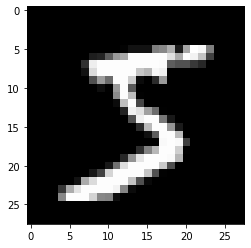

In [5]:
print(f"The dataset has {len(mnist_dataset)} items.")
sample_image, sample_label = mnist_dataset[0]
print(f"The image size is {sample_image.shape} and the number inside it should be {sample_label}\n\n")
plt.imshow(sample_image[0], cmap="gray")

print(
    f"The min value of dataset is: {mnist_dataset.data.min()}\n"
    f"The max value of dataset is: {mnist_dataset.data.max()}\n"
    f"The mean value of dataset is: {mnist_dataset.data.float().mean()}\n"
    f"The STD of dataset is: {mnist_dataset.data.float().std()}"
)

In GANs, scaling the data to the range of -1 to 1 can be beneficial because GANs often use activation functions like tanh, which have a range of -1 to 1. Moreover, scaling the data to a smaller range can help prevent vanishing or exploding gradients. Additionally, by scaling the data to a common range, we can help ensure that the discriminator is better able to distinguish between real and fake samples, which can lead to better performance overall. Consequently, in the next cell, the data is shifted to -1 to 1 range.


In [6]:
data = mnist_dataset.data.float() / 255.0
data_scaled = data.mul(2).sub(1)
labels = mnist_dataset.targets
dataset = torch.utils.data.TensorDataset(data_scaled.view(-1,1,28,28), labels)
data_loader = DataLoader(dataset, batch_size=100, shuffle=True)

New statistical values are:

In [7]:
print(
    f"The min value of dataset is: {data_scaled.min()}\n"
    f"The max value of dataset is: {data_scaled.max()}\n"
    f"The mean value of dataset is: {data_scaled.float().mean()}\n"
    f"The STD of dataset is: {data_scaled.float().std()}"
)

# A snapshot of a scaled sample 

print(f"A snapshot of a scaled sample: \n\n{data_scaled[0][9:15, 9:15]}")

The min value of dataset is: -1.0
The max value of dataset is: 1.0
The mean value of dataset is: -0.7386789917945862
The STD of dataset is: 0.6162156462669373
A snapshot of a scaled sample: 

tensor([[ 0.2235, -0.1608,  0.9843,  0.9843,  0.6078, -0.9137],
        [-0.8902, -0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
        [-1.0000, -1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
        [-1.0000, -1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
        [-1.0000, -1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
        [-1.0000, -1.0000, -1.0000, -1.0000, -0.3647,  0.8824]])


## Discriminator Network

This is a PyTorch implementation of a discriminator neural network that can be used in a GAN (Generative Adversarial Network) architecture. The purpose of the discriminator is to distinguish between real and generated/fake images produced by the generator network in the GAN. Below we explain the code line by line:

1- We defines the Discriminator class as a subclass of the PyTorch nn.Module class, which is a base class for all neural network modules in PyTorch.

2- We define the constructor method for the Discriminator class. It initializes the class with two arguments: in_channels and features. in_channels specifies the number of input channels of the images that the discriminator will receive (defaulting to 1), while features is a list that specifies the number of output channels of each convolutional layer (defaulting to [64, 64]).

3- We call the constructor of the parent class nn.Module to properly initialize the Discriminator class as a module.

4- We define two convolutional layers for the discriminator. conv1 is the first layer and takes in the input tensor with in_channels input channels and produces features[0] output channels. conv2 is the second layer and takes in the output tensor of conv1 with features[0] input channels and produces features[1] output channels. The kernel_size, stride, and padding parameters specify the size of the convolutional kernel, the stride of the convolution, and the amount of padding to add to the input tensor, respectively.

5- We define the activation functions to be used after each convolutional layer. leaky_relu is a leaky ReLU activation function with a negative slope of 0.2, which is a modification of the ReLU activation function that helps prevent the vanishing gradient problem. dropout is a regularization technique that randomly sets a fraction of the input elements to zero during training to prevent overfitting.

6- We define the final fully connected layer of the discriminator. It takes in the output of the second convolutional layer (which has dimensions features[1] x 7 x 7, assuming the input image has dimensions 28 x 28) and produces a single output value. The number of input features to the fully connected layer is calculated as features[1]*7*7.

7- We define the forward method of the Discriminator class, which defines how data is passed through the network.

8- We pass the input tensor x through the two convolutional layers, followed by the leaky ReLU activation function and dropout regularization.

9- The output tensor is then flattened to a 1D tensor using x.view(x.shape[0], -1), where x.shape[0] is the batch size, and -1 specifies that the size of the second dimension should be inferred based on the size of the flattened tensor. The flattened tensor is then passed through the fully connected layer and the output is passed through a sigmoid activation function to produce a single output value between 0 and 1, representing the probability that the input image is real (as opposed to being generated by the generator network).

In [8]:
class Discriminator(nn.Module):
    def __init__(self, in_channels=1, features=[64, 64]):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, features[0], kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(features[0], features[1], kernel_size=3, stride=2, padding=1)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(features[1]*7*7, 1)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.conv2(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return torch.sigmoid(x)

The Leaky ReLU activation function is often used in deep learning models, such as the discriminator network shown in the code, because it helps to prevent the problem of "dying ReLUs" during training.

During the training process, some neurons in a deep neural network may become "dead" and stop responding to any input, due to a large negative bias that causes their output to be always zero. This is a common problem when using the standard ReLU activation function, especially when the learning rate is set too high.

The Leaky ReLU activation function addresses this issue by introducing a small slope (typically 0.2 or 0.01) for negative input values, instead of setting them to zero. This ensures that even if a neuron has a large negative bias, it can still respond to inputs with negative values, which can help to keep the neuron active and improve the model's overall performance.

In the case of the discriminator network shown in the code, the Leaky ReLU activation function is used after each convolutional layer, to introduce non-linearity and help the model learn to discriminate between real and fake images. The small negative slope helps to prevent the problem of dead neurons and ensures that the model can learn from negative input values as well as positive ones.

<img src="https://lh4.googleusercontent.com/r9o_j0_nSS_UEaoBLsPCxB92iyZaxaSB56nKbscr03Tq-bhiSfggqzmy6KAy4RDwcuW3q7oC9wBLbLDg4-DVUOQ16J4uQdPUxMMFDzpM8cS1hTu0jLYo3sZ0M24OKKTRsYN7hNyJIJ1YZpaoog" width="820">


>  Different from the regular ReLU function, Leaky ReLU allows the pass of a small gradient signal for negative values. As a result, it makes the gradients from the discriminator flows stronger into the generator. Instead of passing a gradient (slope) of 0 in the back-prop pass, it passes a small negative gradient.  - [Source](https://sthalles.github.io/advanced_gans/)


## Generator Network

This code defines a PyTorch module for a Generative Adversarial Network (GAN) generator. The GAN is a type of neural network architecture that consists of two models: a generator and a discriminator. The generator takes random noise as input and generates samples that are intended to be similar to the real data. The discriminator takes both real and generated samples as input and tries to distinguish between them. During training, the generator tries to generate samples that are indistinguishable from the real data, while the discriminator tries to correctly classify the samples as real or generated. Below we explain the code line by line:

1- We define a Generator class that inherits from nn.Module. The constructor takes two arguments: latent_dim, which specifies the size of the input noise vector, and features, which is a list of integers that specifies the number of output features in each layer. The default value for features is [128, 128].

2- We call the __init__() method of the superclass (nn.Module) to initialize the Generator object.

3- We create a fully connected layer that maps the input noise vector to a tensor with shape (features[0]*7*7,). The nn.Linear class takes two arguments: the size of the input tensor (latent_dim), and the size of the output tensor (features[0]*7*7).

4- We create a leaky ReLU activation function with a negative slope of 0.2, which is used in the generator network.

5- We create a transposed convolutional layer that upsamples the tensor from the output of the fully connected layer. The nn.ConvTranspose2d class takes five arguments: the number of input channels (features[0]), the number of output channels (features[1]), the size of the kernel (kernel_size=4), the stride of the kernel (stride=2), and the amount of padding to add to the edges of the input tensor (padding=1).

6- We create a second transposed convolutional layer that upsamples the tensor from the output of the first convolutional layer. This layer has a single output channel, which represents the grayscale pixel value of the generated image.

7- We define the forward method for the Generator class, which takes an input tensor x and computes the output tensor of the network.

8- We apply the fully connected layer to the input tensor.

9- We apply the leaky ReLU activation function to the output of the fully connected layer.

10- We reshape the output tensor from a 1D tensor to a 4D tensor with shape (batch_size, features[0], 7, 7).

11- We apply the first transposed convolutional layer to the reshaped tensor.

12- We apply the leaky ReLU activation function to the output of the first convolutional layer.

13- We apply the second transposed convolutional layer to the output of the first convolutional layer.

14- We apply the hyperbolic tangent activation function (torch.tanh) to the tensor x to map the output to the range [-1, 1], which is the same range as the real images in the dataset, and return the resulting tensor.



In [9]:
class Generator(nn.Module):
    def __init__(self, latent_dim, features=[128, 128]):
        super(Generator, self).__init__()
        self.fc = nn.Linear(latent_dim, features[0]*7*7)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.conv1 = nn.ConvTranspose2d(features[0], features[1], kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(features[1], 1, kernel_size=4, stride=2, padding=1)
        
    def forward(self, x):
        x = self.fc(x)
        x = self.leaky_relu(x)
        x = x.view(-1, 128, 7, 7)
        x = self.conv1(x)
        x = self.leaky_relu(x)
        x = self.conv2(x)
        return torch.tanh(x)

We use the TanH activation function for the output layer of the generator.

<img src="https://www.oreilly.com/api/v2/epubs/9781788472173/files/assets/7f566009-af69-4eea-b244-014c5fc4fc19.png" width="820" >

> "The ReLU activation (Nair & Hinton, 2010) is used in the generator with the exception of the output layer which uses the Tanh function. We observed that using a bounded activation allowed the model to learn more quickly to saturate and cover the color space of the training distribution. Within the discriminator we found the leaky rectified activation (Maas et al., 2013) (Xu et al., 2015) to work well, especially for higher resolution modeling." - [Source](https://stackoverflow.com/questions/41489907/generative-adversarial-networks-tanh)


Note that since the outputs of the TanH activation lie in the range `[-1,1]`, we have applied the same transformation to the images in the training dataset.

-- We create an instance of the Discriminator class and assigns it to the variable D. This creates a new object that can be used to classify input images as real or fake.

The default constructor arguments for in_channels and features are used, which means that the discriminator expects a grayscale image with a single channel as input, and the feature maps for the convolutional layers have sizes [64, 64]. These default values can be modified by passing in different arguments when creating a new instance of the Discriminator class.

After creating the D object, it can be used to classify input images by passing them through the forward method of the discriminator network. For example, D(image) would classify the image tensor image as real or fake.

We move the D object, which is an instance of the Discriminator class, to the specified device. The device argument is typically either "cpu" or "cuda" (for GPUs) and specifies the device where the tensor operations will be executed.

Moving the object to the specified device is necessary if the model's parameters and operations are going to be computed on that device. By default, the nn.Module object is created on the CPU, so it needs to be moved to the GPU (or another device) before it can be used for training or inference. The D object will be using the specified device for its operations. Any input tensors that are passed to the D object for classification will also need to be on the same device.


-- We initialize a generator model called G with the specified latent size = 100 (i.e., the size of the input noise vector) and default feature sizes of 128.

We move the Generator model to the specified device (CPU or GPU) to leverage hardware acceleration during training or inference. If device is set to "cuda", the model and associated tensors will be moved to the GPU memory, and if device is set to "cpu", the model will remain on the CPU.


-- We definine the loss function and the optimizers for both the generator and discriminator models.

nn.BCELoss() creates an instance of the binary cross-entropy loss function. It is commonly used in binary classification problems, where the task is to classify an input into one of two classes. In the case of GANs, the discriminator's task is to classify an input image as either real or fake, so the binary cross-entropy loss is a suitable choice for the discriminator.

torch.optim.Adam() creates an instance of the Adam optimizer, which is a popular optimization algorithm commonly used for deep learning. We are creating separate Adam optimizers for both the discriminator (D) and the generator (G). The lr argument sets the learning rate for the optimizer, which controls how quickly the model parameters are updated during training. In this case, we set the learning rate to 0.0002, which is a common choice for GANs.

In [10]:
D = Discriminator().to(device)
G = Generator(latent_size).to(device)
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

Since the discriminator is a binary classification model, we can use the binary cross entropy loss function to quantify how well it is able to differentiate between real and generated images.

<img src="https://chris-said.io/assets/2020_cross_entropy/cross-entropy.png" width="620" >

We generate an output vector using the generator and view it as an image.

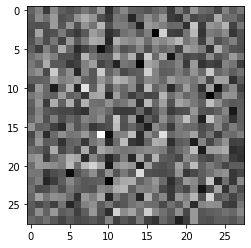

In [11]:
plt.imshow(G(torch.randn(1, latent_size).to(device))[0][0].detach().cpu().numpy(), cmap='gray')

As one might expect, the output from the generator is basically random noise.

## Discriminator Training

We define helper functions to reset gradients and  train the discriminator.

In [12]:
def reset_grad():
    # Set the gradients of the discriminator and generator models to zero
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

def train_discriminator(images):
    # Reset the gradients before computing them for the current batch
    reset_grad()

    # Create labels for the real and fake images
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)
    
    # Compute the loss and scores for the real images
    outputs = D(images)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Generate fake images and compute the loss and scores for them
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Combine the losses for the real and fake images
    d_loss = d_loss_real + d_loss_fake

    # Compute the gradients for the discriminator model
    d_loss.backward()

    # Update the discriminator parameters using the computed gradients
    d_optimizer.step()

    # Return the loss and scores for the real and fake images
    return d_loss, real_score, fake_score

Here are the steps involved in training the discriminator.

- We expect the discriminator to output 1 if the image was picked from the real MNIST dataset, and 0 if it was generated. 

- We first pass a batch of real images, and compute the loss, setting the target labels to 1. 

- Then, we generate a batch of fake images using the generator, pass them into the discriminator, and compute the loss, setting the target labels to 0. 

- Finally we add the two losses and use the overall loss to perform gradient descent to adjust the weights of the discriminator.

It's important to note that we don't change the weights of the generator model while training the discriminator (`d_optimizer` only affects the `D.parameters()`)

## Generator Training

Since the outputs of the generator are images, it's not obvious how we can train the generator. This is where we employ a rather elegant trick, which is to use the discriminator as a part of the loss function. Here's how it works:

- We generate a batch of images using the generator, pass the into the discriminator.

- We calculate the loss by setting the target labels to 1 i.e. real. We do this because the generator's objective is to "fool" the discriminator. 

- We use the loss to perform gradient descent i.e. change the weights of the generator, so it gets better at generating real-like images.

Here's what this looks like in code.

In [13]:
def train_generator():
    # Reset the gradients before computing them for the current batch
    reset_grad()
    # Generate fake images and calculate loss
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    labels = torch.ones(batch_size, 1).to(device)
    g_loss = criterion(D(fake_images), labels)
    
    # Backpropagate the loss and optimize the generator parameters
    g_loss.backward()
    g_optimizer.step()
    # Return the loss and the fake images
    return g_loss, fake_images

## Training the Model

We create a directory where we can save intermediate outputs from the generator to visually inspect the progress of the model

In [14]:
# Check if the 'samples' directory exists; if not, create it
sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

We save a batch of real images that we can use for visual comparision while looking at the generated images.

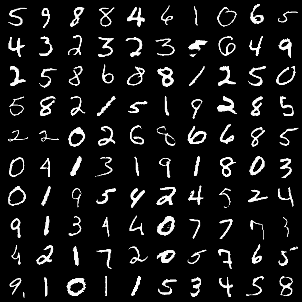

In [15]:
# Save some real images
for images, _ in data_loader:
    # Reshape the images tensor to have shape (batch_size, 1, 28, 28)
    images = images.reshape(images.size(0), 1, 28, 28)
    # Save the images as a grid to a file named 'real_images.png'
    save_image(images, os.path.join(sample_dir, 'real_images.png'), nrow=10)
    # Break out of the loop after processing the first batch
    break
# Display the saved image using the Image() function from the PIL library  
Image(os.path.join(sample_dir, 'real_images.png'))

We'll also define a helper function to save a batch of generated images to disk at the end of every epoch. We'll use a fixed set of input vectors to the generator to see how the individual generated images evolve over time as we train the model.

Saving fake_images-0000.png


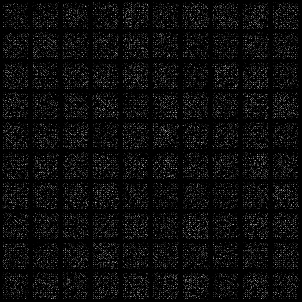

In [16]:
# Generate a batch of random noise vectors
sample_vectors = torch.randn(batch_size, latent_size).to(device)
# Define a function to save fake images to a file
def save_fake_images(index):
    # Generate fake images from the random noise vectors
    fake_images = G(sample_vectors)
    # Reshape the fake images tensor to have shape (batch_size, 1, 28, 28)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    # Create a filename for the fake images based on the index
    fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
    # Print a message indicating that the fake images are being saved
    print('Saving', fake_fname)
    # Save the fake images as a grid to a file
    save_image(fake_images, os.path.join(sample_dir, fake_fname), nrow=10)
    
# Call the save_fake_images() function to save the first set of fake images
save_fake_images(0)
# Display the first saved fake image using the Image() function from the PIL library
Image(os.path.join(sample_dir, 'fake_images-0000.png'))

In each epoch, we train the discriminator first, and then the generator. 

In [17]:
%%time

total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        # Load a batch of images and their corresponding labels
        # images shape: (batch_size, channels, height, width)
        # labels shape: (batch_size,)

        # Move images to device (GPU)
        images = images.to(device)
        
        # Train the discriminator and get the discriminator loss and scores
        d_loss, real_score, fake_score = train_discriminator(images)

        # Train the generator and get the generator loss and generated fake images
        g_loss, fake_images = train_generator()
        g_loss, fake_images = train_generator()
    
        
        
        # Inspect the losses
        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
        
    # Save the generated fake images
    save_fake_images(epoch+1)

Epoch [0/100], Step [200/600], d_loss: 0.0257, g_loss: 3.7957, D(x): 0.99, D(G(z)): 0.01
Epoch [0/100], Step [400/600], d_loss: 0.6029, g_loss: 1.5267, D(x): 0.77, D(G(z)): 0.25
Epoch [0/100], Step [600/600], d_loss: 1.0357, g_loss: 1.1988, D(x): 0.77, D(G(z)): 0.40
Saving fake_images-0001.png
Epoch [1/100], Step [200/600], d_loss: 0.8768, g_loss: 1.2883, D(x): 0.66, D(G(z)): 0.30
Epoch [1/100], Step [400/600], d_loss: 1.2234, g_loss: 1.1366, D(x): 0.57, D(G(z)): 0.38
Epoch [1/100], Step [600/600], d_loss: 1.3010, g_loss: 0.9345, D(x): 0.60, D(G(z)): 0.45
Saving fake_images-0002.png
Epoch [2/100], Step [200/600], d_loss: 1.1891, g_loss: 0.9307, D(x): 0.57, D(G(z)): 0.42
Epoch [2/100], Step [400/600], d_loss: 1.3400, g_loss: 0.8378, D(x): 0.49, D(G(z)): 0.44
Epoch [2/100], Step [600/600], d_loss: 1.4169, g_loss: 0.7213, D(x): 0.49, D(G(z)): 0.49
Saving fake_images-0003.png
Epoch [3/100], Step [200/600], d_loss: 1.4969, g_loss: 0.6787, D(x): 0.47, D(G(z)): 0.51
Epoch [3/100], Step [400/6

Now that we have trained the models, we can save it.

In [18]:
# Save the model checkpoints 
torch.save(G.state_dict(), 'G')
torch.save(D.state_dict(), 'D')

Here's how the generated images look, after the 1st, 50th, 80th and 100th epochs of training.

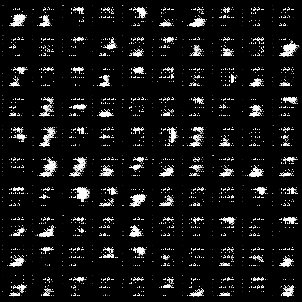

In [19]:
Image('./samples/fake_images-0001.png')

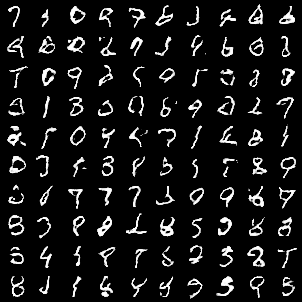

In [20]:
Image('./samples/fake_images-0050.png')

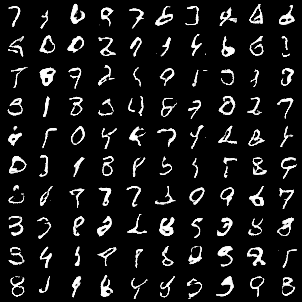

In [21]:
Image('./samples/fake_images-0080.png')

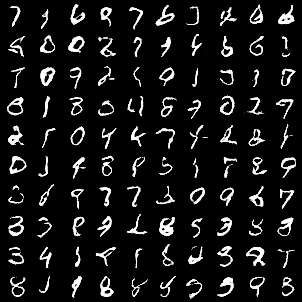

In [22]:
Image('./samples/fake_images-0100.png')

We can visualize the training process by combining the sample images generated after each epoch into a video using OpenCV.

In [23]:
vid_fname = 'gans_training.avi'

files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'fake_images' in f]
files.sort()

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 8, (302,302))
[out.write(cv2.imread(fname)) for fname in files]
out.release()
FileLink('gans_training.avi')

/content/gans_training.avi

We can also visualize how the loss changes over time. Visualizing losses is quite useful for debugging the training process. For GANs, we expect the generator's loss to reduce over time, without the discriminator's loss getting too high.

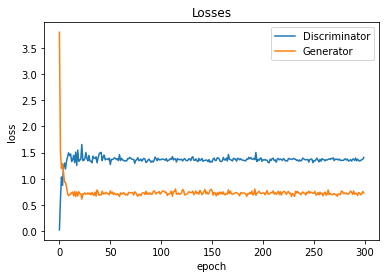

In [24]:
# Plot the discriminator and generator losses
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')

# Set the x-axis label to 'epoch'
plt.xlabel('epoch')

# Set the y-axis label to 'loss'
plt.ylabel('loss')

# Create a legend for the plot with labels 'Discriminator' and 'Generator'
plt.legend(['Discriminator', 'Generator'])

# Set the title of the plot to 'Losses'
plt.title('Losses');

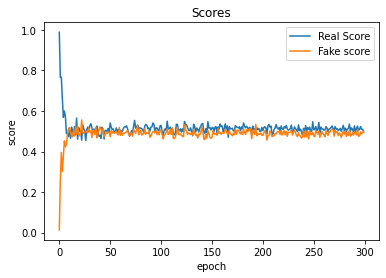

In [25]:
# Plot the real and fake scores
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')

# Set the x-axis label to 'epoch'
plt.xlabel('epoch')

# Set the y-axis label to 'score'
plt.ylabel('score')

# Create a legend for the plot with labels 'Real Score' and 'Fake score'
plt.legend(['Real Score', 'Fake score'])

# Set the title of the plot to 'Scores'
plt.title('Scores');

# References

1.	Audichya, P., D. Gupta, and A. Singh. Generative Adversarial Networks: Models and Techniques-A Review. in 2022 IEEE World Conference on Applied Intelligence and Computing (AIC). 2022. IEEE.
2.	Vishwakarma, D.K. Comparative analysis of deep convolutional generative adversarial network and conditional generative adversarial network using hand written digits. in 2020 4th International Conference on Intelligent Computing and Control Systems (ICICCS). 2020. IEEE.
3.	Fan, Z. and J. Hu. Review and Prospect of Research on Generative Adversarial Networks. in 2019 IEEE 11th International Conference on Communication Software and Networks (ICCSN). 2019. IEEE.
4.	Wu, C. Performance Review of Generative Adversarial Network for a Bi-directional Task. in 2021 International Conference on Signal Processing and Machine Learning (CONF-SPML). 2021. IEEE.
5.	Goodfellow, I., et al., Advances in neural information processing systems. Curran Associates, Inc, 2014. 27: p. 2672-2680.
6.	Goodfellow, I., et al., Generative adversarial networks. Communications of the ACM, 2020. 63(11): p. 139-144.
7.	Goodfellow, I.J., et al., Generative adversarial networks. Commun. Acm, 2020. 63(11): p. 139-144.
8.	Liu, Z., et al. Research on extended image data set based on deep convolution Generative Adversarial Network. in 2020 IEEE 4th Information Technology, Networking, Electronic and Automation Control Conference (ITNEC). 2020. IEEE.
9.	Wang, L., et al., A state-of-the-art review on image synthesis with generative adversarial networks. IEEE Access, 2020. 8: p. 63514-63537.
10.	Liu, S., et al. Face aging with contextual generative adversarial nets. in Proceedings of the 25th ACM international conference on Multimedia. 2017.
11.	Isola, P., et al. Image-to-image translation with conditional adversarial networks. in Proceedings of the IEEE conference on computer vision and pattern recognition. 2017.
12.	Odena, A., C. Olah, and J. Shlens. Conditional image synthesis with auxiliary classifier gans. in International conference on machine learning. 2017. PMLR.
13.	Berthelot, D., T. Schumm, and L. Metz, Began: Boundary equilibrium generative adversarial networks. arXiv preprint arXiv:1703.10717, 2017.
14.	Cao, Y.-J., et al., Recent advances of generative adversarial networks in computer vision. IEEE Access, 2018. 7: p. 14985-15006.
15.	LeCun, Y., Y. Bengio, and G. Hinton, Deep learning. nature, 521 (7553), 436-444. Google Scholar Google Scholar Cross Ref Cross Ref, 2015: p. 25.
16. 	N. Kodali, J. Abernethy, J. Hays, and Z. Kira, “On convergence and stability of gans,” arXiv preprint arXiv:1705.07215, 2017.
17.	M. Mirza and S. Osindero, “Conditional generative adversarial nets,” arXiv preprint arXiv:1411.1784, 2014.
18. 	M. Arjovsky, S. Chintala, and L. Bottou, “Wasserstein generative adversarial networks,” in International conference on machine learning, 2017, pp. 214–223.
19.	J.-Y. Zhu, T. Park, P. Isola, and A. A. Efros, “Unpaired image-to-image translation using cycle-consistent adversarial networks,” in Proceedings of the IEEE international conference on computer vision, 2017, pp. 2223–2232.
20. 	T. Karras, T. Aila, S. Laine, and J. Lehtinen, “Progressive growing of gans for improved quality, stability, and variation,” arXiv preprint arXiv:1710.10196, 2017.

